In [7]:
import easyocr
import cv2
from PIL import Image

import os







In [8]:
#Remove dodgy images
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image in os.listdir(data_dir):
    image_path = os.path.join(data_dir, image)
    try:
        img = cv2.imread(image_path)
        _, ext = os.path.splitext(image_path)
        ext = ext.lower().replace('.', '')
        if ext not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
        #else :
            #print("it's ok")
    except Exception as e:
        print('Issue with image {}'.format(image_path))
        # os.remove(image_path)

Image not in ext list data\.ipynb_checkpoints
Issue with image data\.ipynb_checkpoints


In [9]:
import pandas as pd
import numpy as np 

from glob import glob 
from tqdm.notebook import tqdm 

import matplotlib.pyplot as plt 

In [10]:
img_fns = glob(data_dir + '/*')
#print(img_fns)

In [11]:
img_id = img_fns[0].split('\\')[-1].split('.')[0]

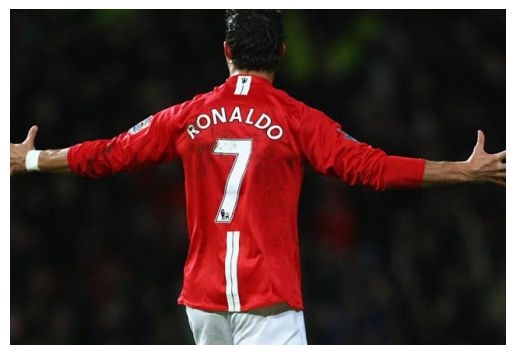

In [12]:
img = plt.imread(img_fns[0]); plt.imshow(img); plt.axis('off'); plt.show()
#plt.imshow(plt.imread(img_fns[0]))

In [19]:
reader = easyocr.Reader(['en'], gpu = False)

dfs = []
for i in range(5):
    img = plt.imread(img_fns[i])
    result = reader.readtext(img)
    img_id = img_fns[0].split('\\')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

Using CPU. Note: This module is much faster with a GPU.


In [20]:
import keras_ocr

In [22]:
def plot_compare(img_fns, easyocr_df):
    img_id = img_fns[0].split('\\')[-1].split('.')[0]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    easy_results = easyocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize=24)

    #keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    #keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    #keras_ocr.tools.drawAnnotations(plt.imread(img_fn), 
                                    #keras_results, ax=axs[1])
    #axs[1].set_title('keras_ocr results', fontsize=24)
    plt.show()

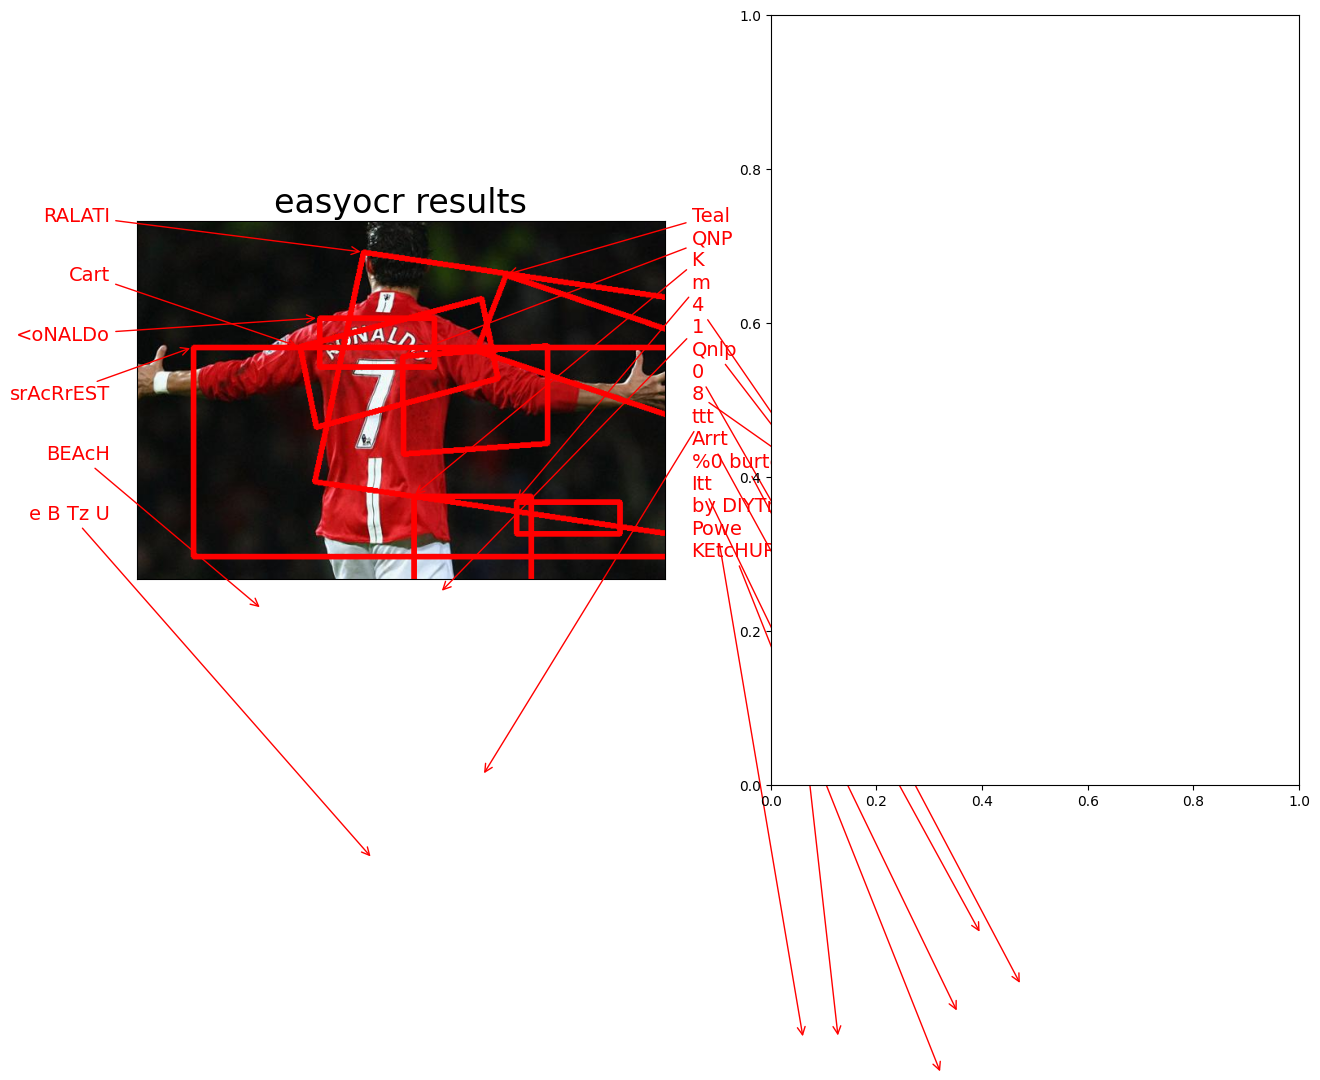

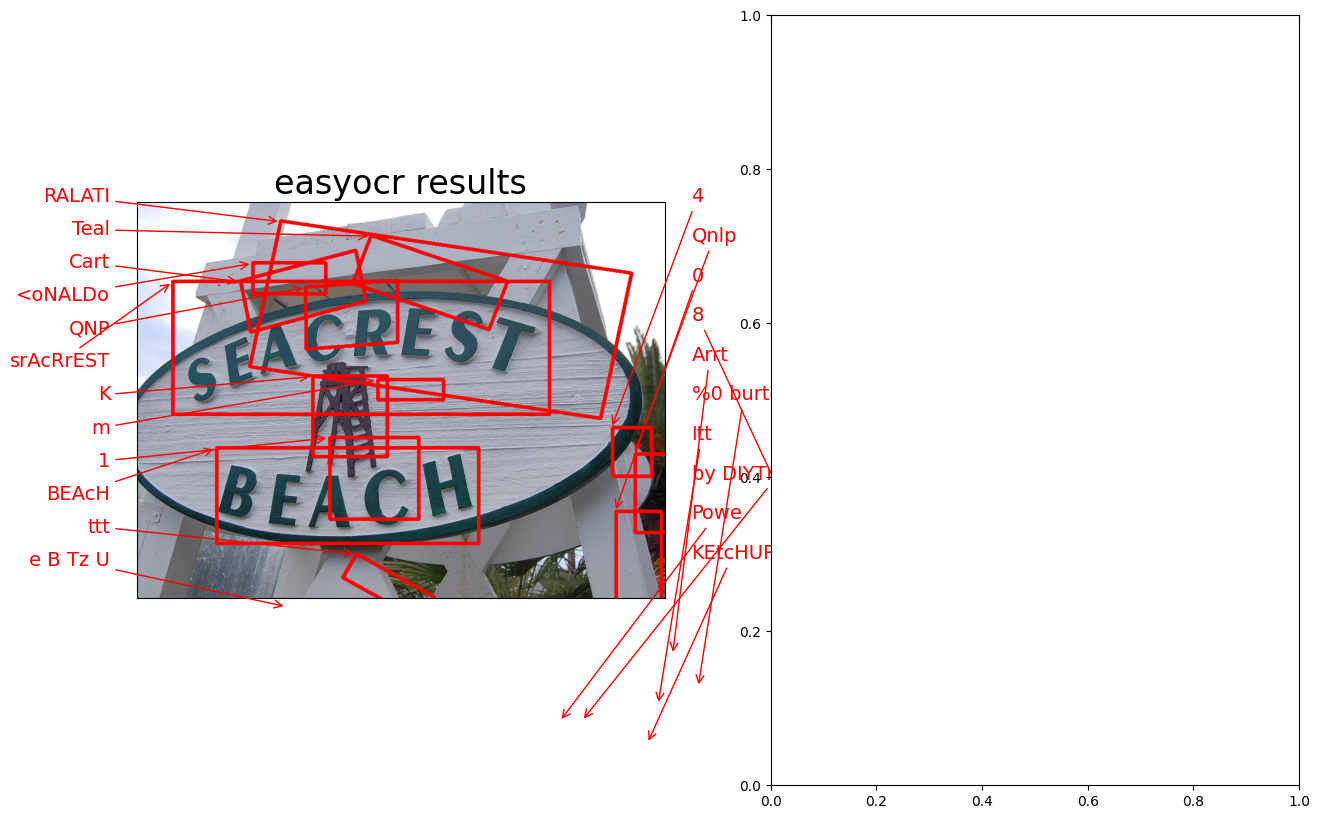

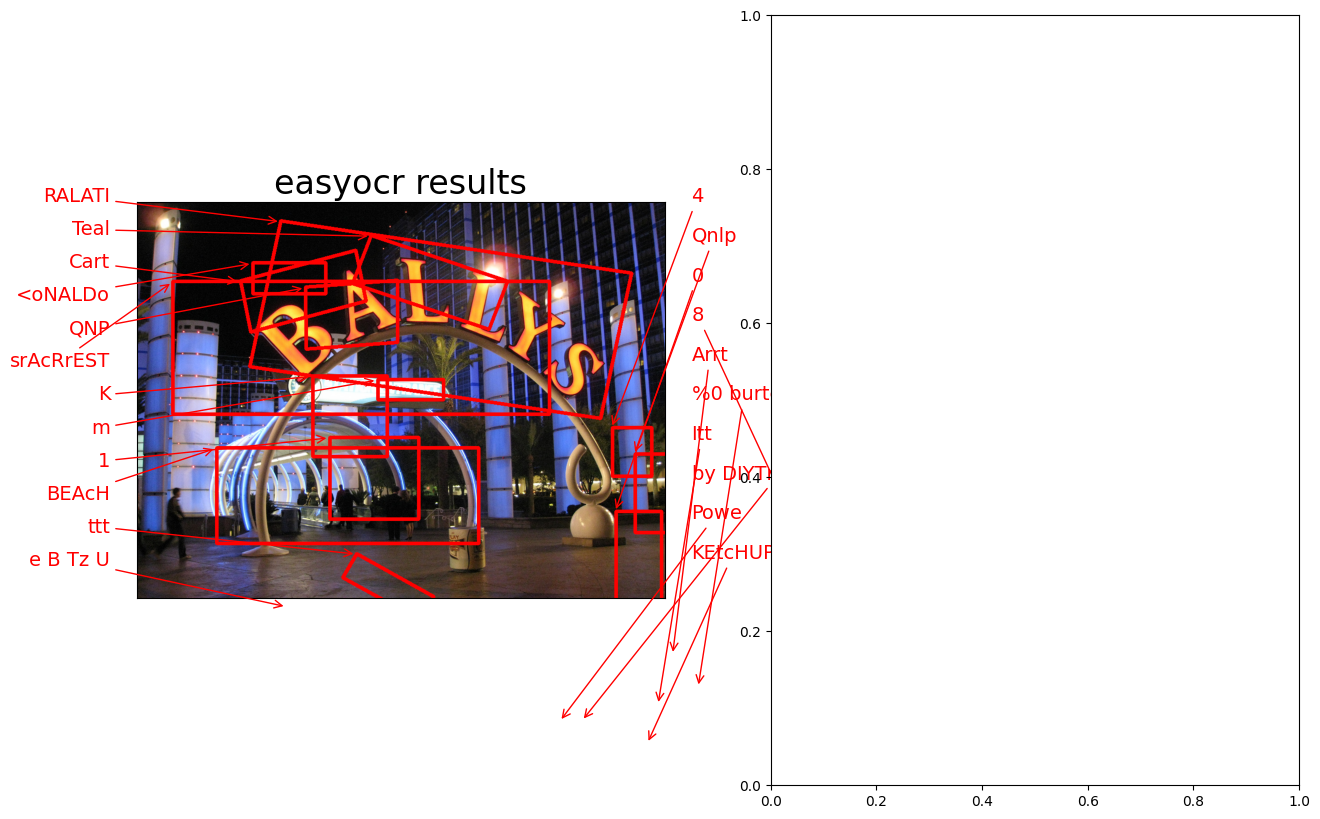

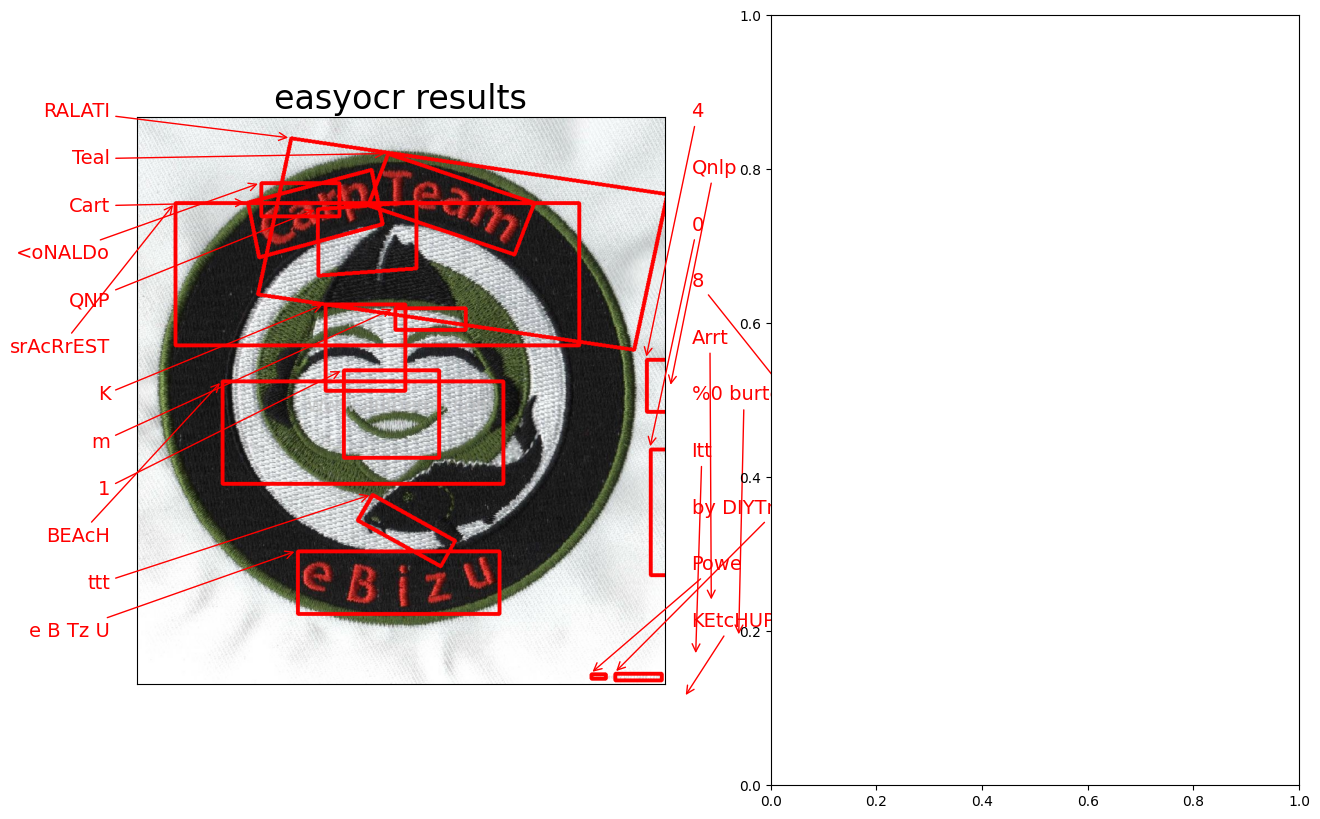

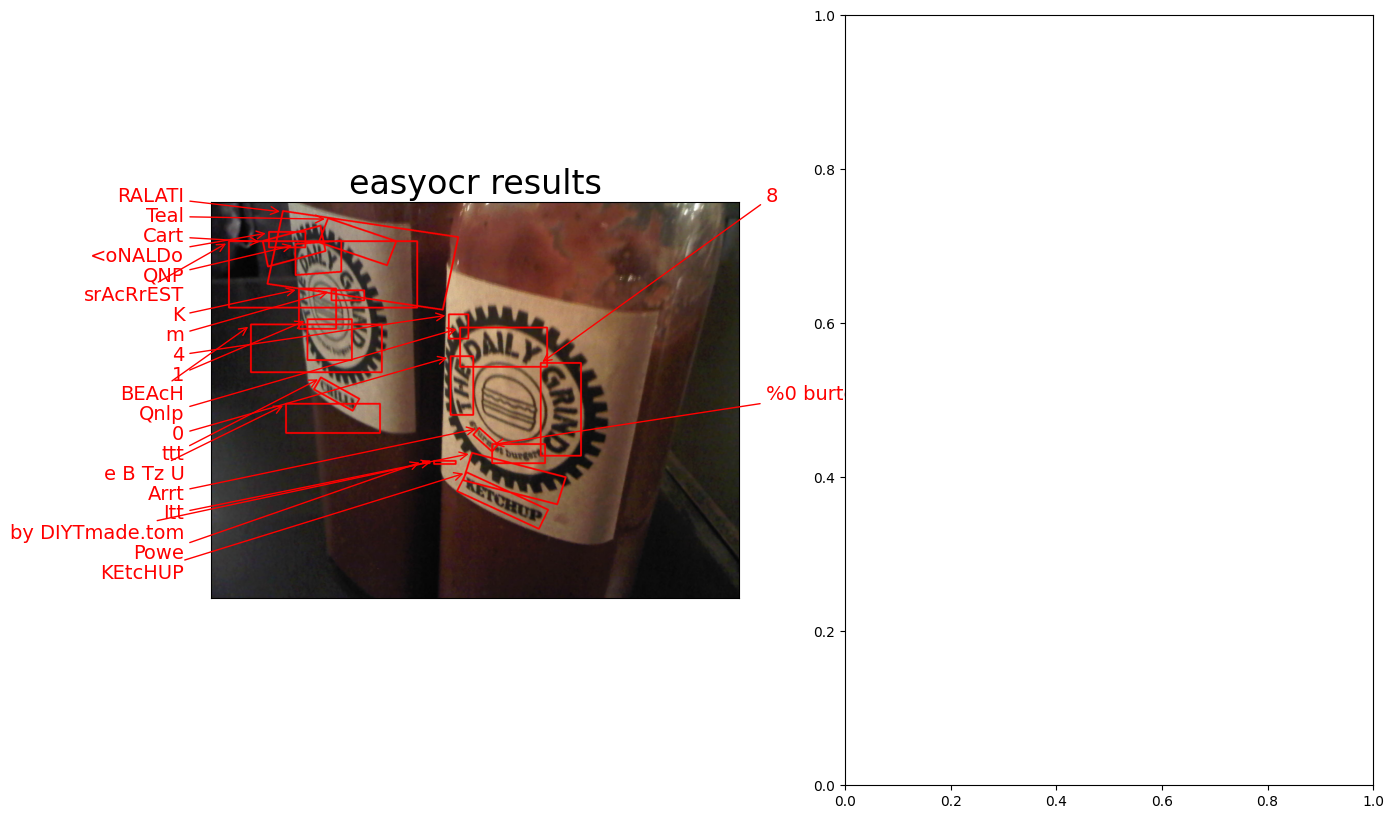

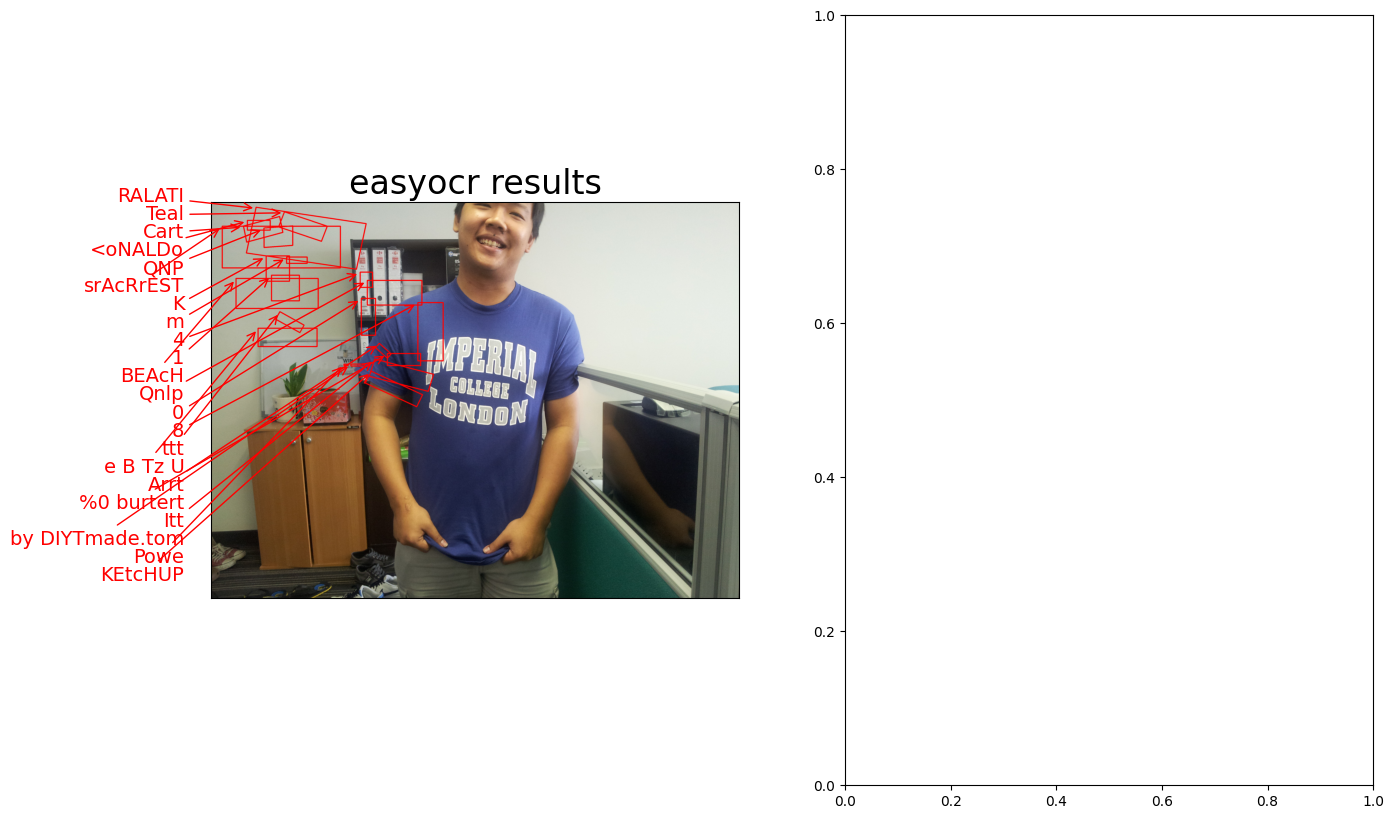

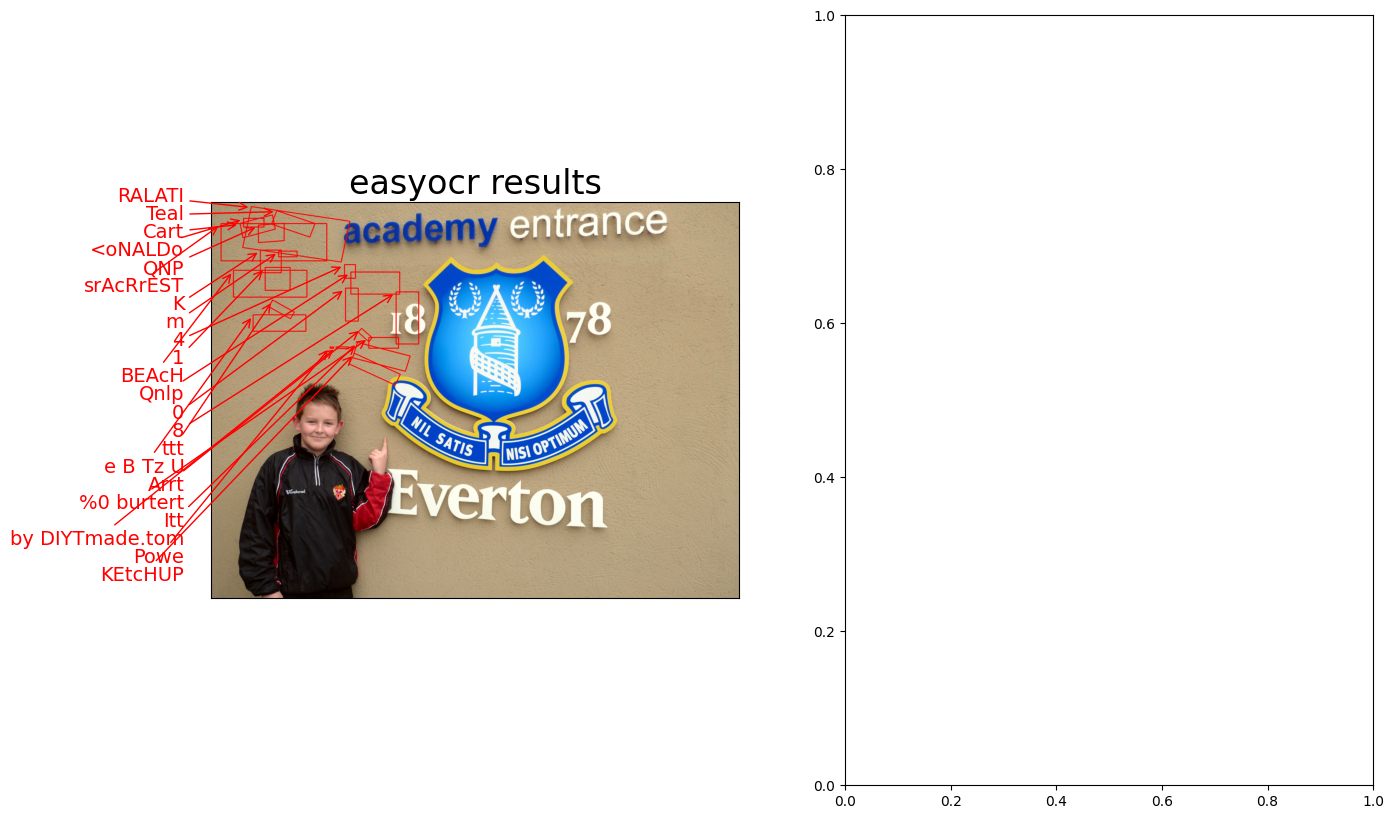

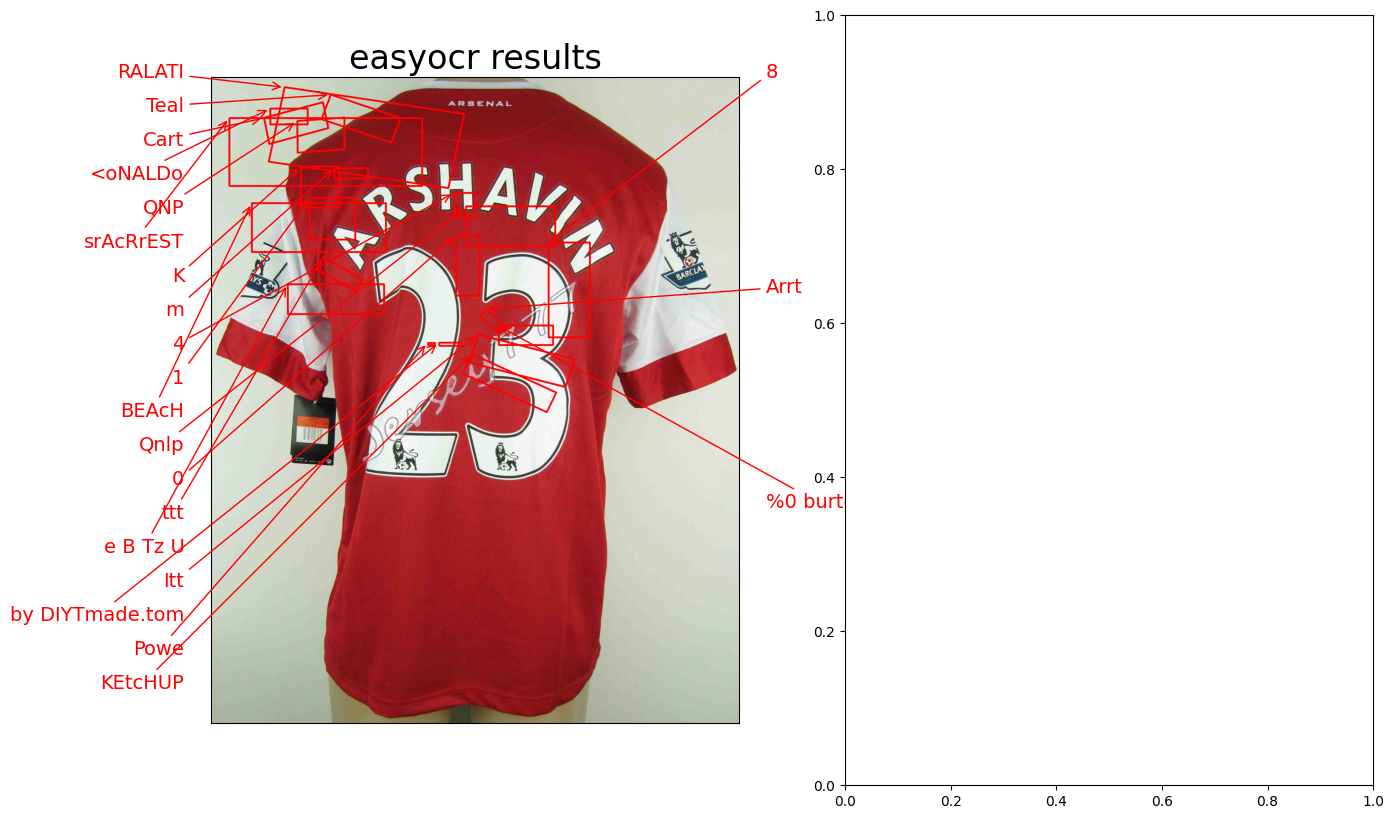

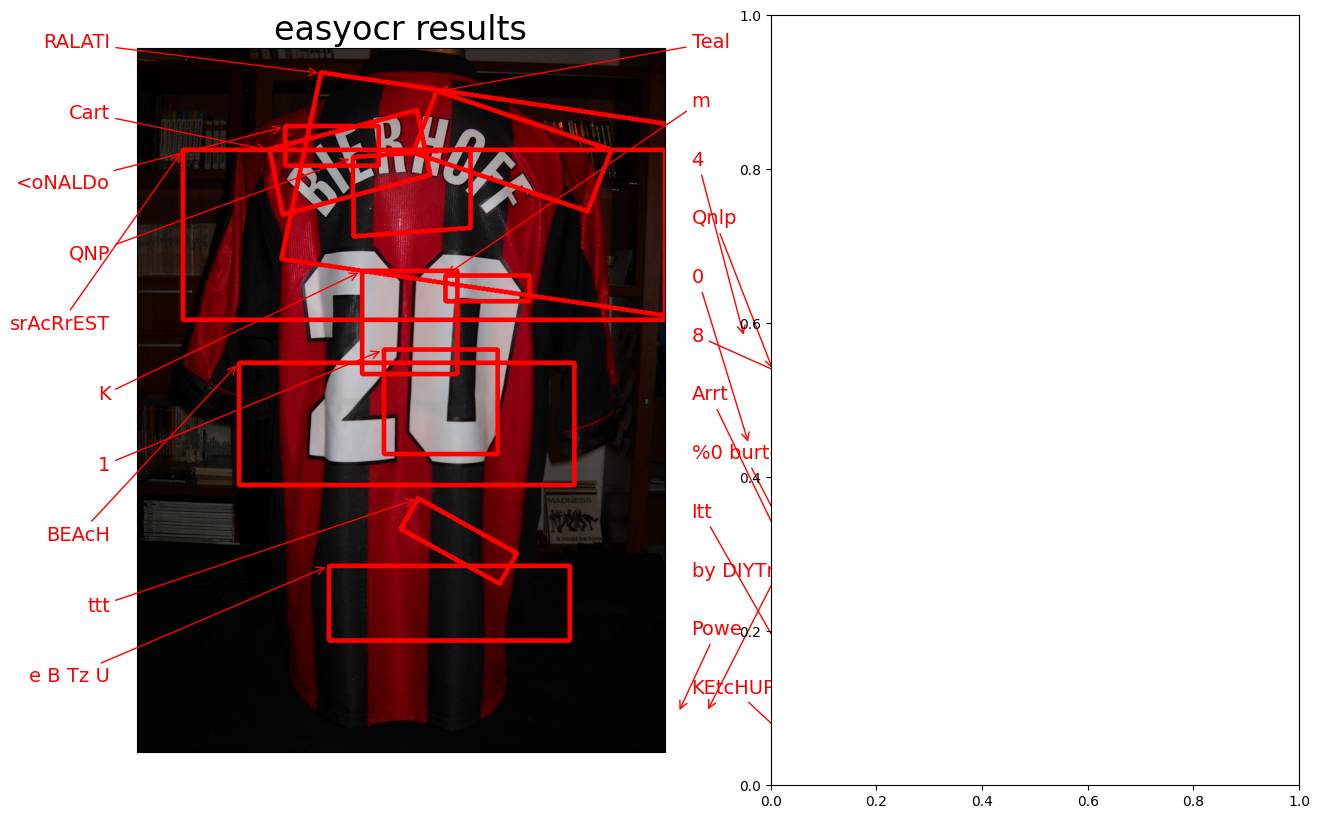

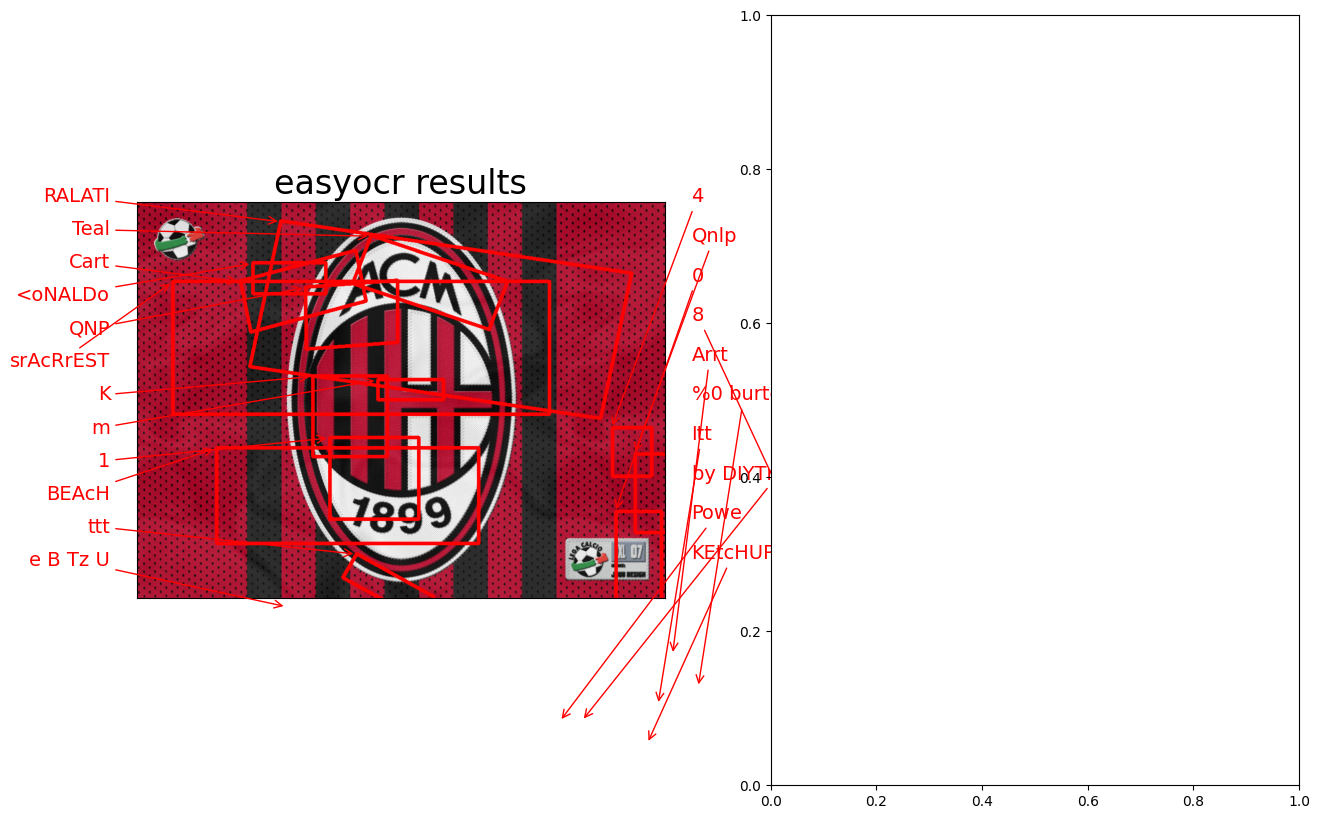

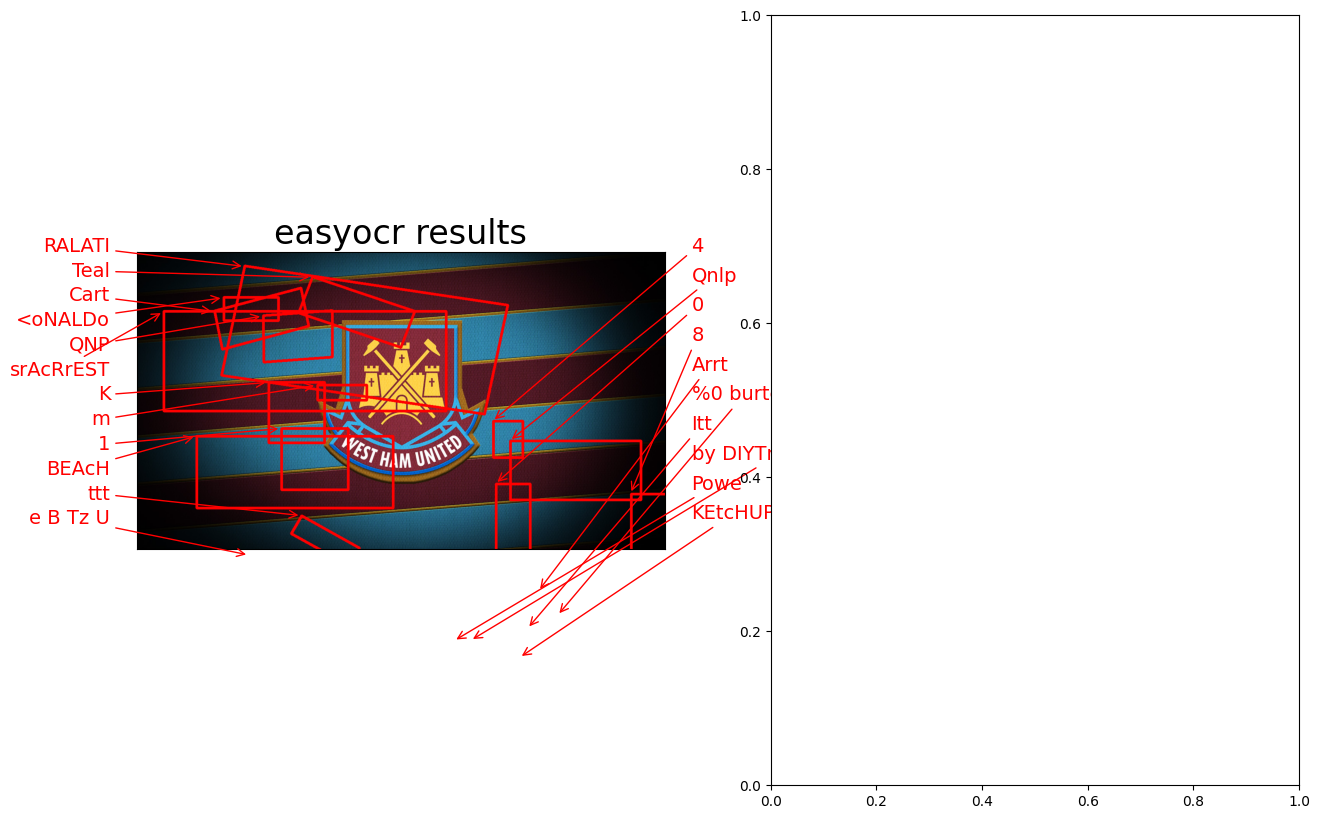

In [ ]:
# Loop over results
for img_fn in img_fns[:25]:
    plot_compare(img_fns, easyocr_df)

In [ ]:


reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext('de.png')

#for (bbox, text, prob) in result:
  #print(text)

print(result)

In [3]:


# Charger l'image
image = cv2.imread('de.png')



# Obtenir les résultats de la détection de texte
result = reader.readtext('de.png')

# Dessiner les rectangles verts autour des zones de texte détectées
for detection in result:
    bbox = detection[0]
    cv2.rectangle(image, (bbox[0][0], bbox[0][1]), (bbox[2][0], bbox[2][1]), (0, 255, 0), 2)

# Enregistrer l'image avec les rectangles dessinés
cv2.imwrite('text_detection_output.png', image)

True